In [3]:
%matplotlib inline
'''Standard python modules'''
import sys

'''For scientific computing'''
from numpy import *
import scipy

'''For plotting'''
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

EX_DIRECTORY_PATH = './data/'

def part1():
    A = eye(5)
    print (A)


def hypothesis(X, theta):
    """Hypothesis function for linear regression
    this should be inlined code, but it's here for clear representation purpsoes
    """
    return X.dot(theta)


def computeCostLoop(X, y, theta):
    """Compute cost but in the slower loop method, in order to show how the
    pre-vectorization algorithm initially works. Always start with loop version first
    and code the vectorized version later
    """
    m = len(y)  # or m = shape(y)[0], since y is 1D

    cumulative_sum = 0
    for i in range(0, m):
        cumulative_sum += (hypothesis(X[i], theta) - y[i]) ** 2
    cumulative_sum = (1.0 / (2 * m)) * cumulative_sum
    return cumulative_sum


def computeCost(X, y, theta):
    """Compute cost, vectorized version"""
    m    = len(y)
    term = hypothesis(X, theta) - y
    # sum( term**2 ) in this case ~= term.T.dot( term )
    return (term.T.dot(term) / (2 * m))[0, 0]


def gradientDescentLoop(X, y, theta, alpha, iterations):
    """Gradient descent in loop version"""
    grad = copy(theta)
    m    = len(y)
    n    = shape(X)[1]

    for counter in range(0, iterations):
        # create n number of cumulative inner sums
        cum_sum = [0 for x in range(0, n)]

        for j in range(0, n):
            for i in range(0, m):
                term         = (hypothesis(X[i], grad) - y[i])
                cum_sum[j] += X[i, j] * (term)

        # assign new values for each gradient, this should be separate from the loop above
        # in order to achieve simulataneous update effect
        for j in range(0, n):
            grad[j] = grad[j] - cum_sum[j] * (alpha / m)

    return grad


def gradientDescent(X, y, theta, alpha, iterations):
    """Vectorized gradient descent"""
    grad = copy(theta)
    m    = len(y)

    for counter in range(0, iterations):
        inner_sum = X.T.dot(hypothesis(X, grad) - y)
        grad    -= alpha / m * inner_sum

    return grad


def plot(X, y):
    """Create a plot out of X and y data, X should exclude the intercept units.
    Call pyplot.show(block=True) in order to show the plot window"""
    pyplot.plot(X, y, 'rx', markersize=5 )
    pyplot.ylabel('Profit in $10,000s')
    pyplot.xlabel('Population of City in 10,000s')


def part2_1():
    data = genfromtxt( EX_DIRECTORY_PATH + "ex1data1.txt", delimiter=',')
    X, y = data[:, 0], data[:, 1]
    m    = len(y)
    y    = y.reshape(m, 1)

    plot(X, y)
    pyplot.show(block=True)


def part2_2():
    data = genfromtxt( EX_DIRECTORY_PATH + 'ex1data1.txt', delimiter=',')
    X, y = data[:, 0], data[:, 1]
    m    = len(y)
    y    = y.reshape(m, 1)
    X             = c_[ones((m, 1)), X]
    
    theta         = zeros((2, 1))
    iterations    = 1500
    alpha         = 0.01

    cost      = computeCost(X, y, theta)  # should be 32.07
    theta     = gradientDescent(X, y, theta, alpha, iterations)
    print("Cost:",cost)
    print("Theta[0]:",theta[0]);
    print("Theta[1]:",theta[1]);


    predict1 = array([1, 3.5]).dot(theta)
    predict2 = array([1, 7]).dot(theta)
    print("For population = 35,000, we predict a profit of ",predict1*10000)
    print("For population = 70,000, we predict a profit of ",predict2*10000)

    plot(X[:, 1], y)
    pyplot.plot(X[:, 1], X.dot(theta), 'b-')
    pyplot.show(block=True)


def part2_4():
    data = genfromtxt( EX_DIRECTORY_PATH + "ex1data1.txt", delimiter=',')
    X, y = data[:, 0], data[:, 1]
    m    = len(y)
    y    = y.reshape(m, 1)
    X    = c_[ones((m, 1)), X]
    
    theta         = zeros((2, 1))
    iterations    = 1500
    alpha         = 0.01
    
    
    theta     = gradientDescent(X, y, theta, alpha, iterations)


    theta0_vals = linspace(-10, 10, 100)
    theta1_vals = linspace(-4, 4, 100)

    J_vals = zeros((len(theta0_vals), len(theta1_vals)), dtype=float64)
    for i, v0 in enumerate(theta0_vals):
        for j, v1 in enumerate(theta1_vals):
            t          = array((theta0_vals[i], theta1_vals[j])).reshape(2, 1)
            J_vals[i, j] = computeCost(X, y, t)

    R, P = meshgrid(theta0_vals, theta1_vals)

    fig = pyplot.figure()
    ax     = fig.gca(projection='3d')
    ax.plot_surface(R, P, J_vals)
    pyplot.show(block=True)

    fig = pyplot.figure()
    # ax     = fig.gca(projection='3d')
    pyplot.contour(R, P, J_vals.T, logspace(-2, 3, 20))
    pyplot.plot(theta[0], theta[1], 'rx', color='red', marker='X', markersize = 10)
    pyplot.xlabel('theta_0');
    pyplot.ylabel('theta_1');
    pyplot.show(block=True)

In [4]:
def main():
    set_printoptions(precision=6, linewidth=200)

In [5]:
    part1()

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


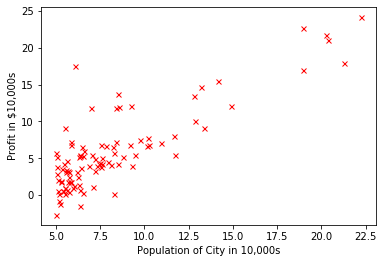

In [6]:
    part2_1()

Cost: 32.07273387745567
Theta[0]: [-3.63029144]
Theta[1]: [1.16636235]
For population = 35,000, we predict a profit of  [4519.7678677]
For population = 70,000, we predict a profit of  [45342.45012945]


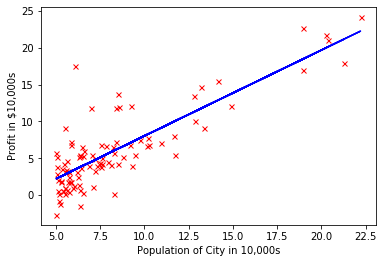

In [7]:
    part2_2()

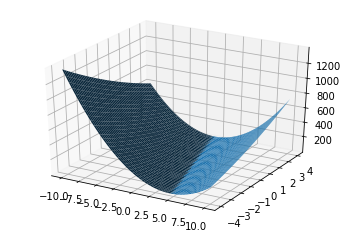

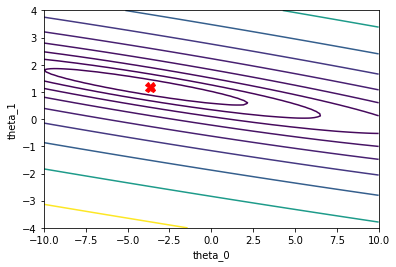

In [8]:
    part2_4()

In [9]:
if __name__ == '__main__':
    main()